In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv("D:\DataTrained Projects\Project3\Big Mart/bigdatamart_Train.csv") 
new_data=pd.read_csv("D:\DataTrained Projects\Project3\Big Mart/bigdatamart_Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(train.shape)
print(new_data.shape)

(8523, 12)
(5681, 11)


In [6]:
print(train.info())
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

#### EDA

We could see some missing values, so we need to impute missing values.
we need to handle categericial values.
We need to perform scaling.

In [7]:
categorical_train=[j for j in train if train[j].dtype == 'object']
categorical_new_data =[k for k in new_data if new_data[k].dtype == 'object']

In [8]:
for i in categorical_train:
    columns = train[i].unique()
    print(i,columns)

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size ['Medium' nan 'High' 'Small']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [9]:
for col in categorical_new_data:
    columns2 = new_data[col].unique()
    print(i,columns2)

Outlet_Type ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
Outlet_Type ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Outlet_Type ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Outlet_Type ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
Outlet_Type ['Medium' nan 'Small' 'High']
Outlet_Type ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [10]:
train.insert(loc=9,column='current_year',value=2021)
new_data.insert(loc=8,column='current_year',value=2021)

In [11]:
train['Outlet_age']=train['current_year']- train['Outlet_Establishment_Year']
new_data['Outlet_age']=new_data['current_year']- new_data['Outlet_Establishment_Year']

In [12]:
train=train.drop(['current_year','Outlet_Establishment_Year'],axis=1)
new_data=new_data.drop(['current_year','Outlet_Establishment_Year'],axis=1)

Handling Missing Values


In [13]:
print(train.isnull().sum())
print('\n\n\n')
print(new_data.isnull().sum())

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_age                 0
dtype: int64




Item_Identifier            0
Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_age                 0
dtype: int64


In [14]:
## replacing the duplicate values in 'Item_Weight'
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = False)
new_data['Item_Fat_Content']=new_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = False) 

In [15]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


<AxesSubplot:>

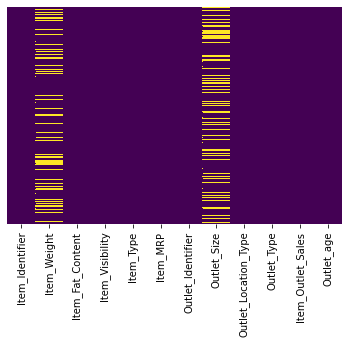

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

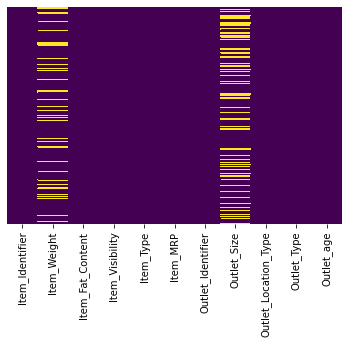

In [17]:
sns.heatmap(new_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


By looking at the above graph, we can say that not too much data is missing in the same area. they are evenly distrbuted 

In [18]:
print(train.Outlet_Size.value_counts())
print(new_data.Outlet_Size.value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [19]:
## imputing categorical variable with the most repeated
mode=train['Outlet_Size'].mode().values[0]
train['Outlet_Size']=train['Outlet_Size'].replace(np.nan,mode,inplace=False)
mode1=new_data['Outlet_Size'].mode().values[0]
new_data['Outlet_Size']=new_data['Outlet_Size'].replace(np.nan,mode,inplace=False)

<AxesSubplot:>

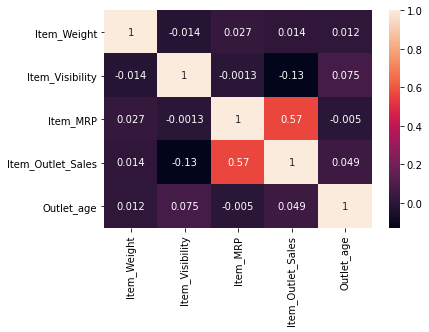

In [21]:
corr=train.iloc[:,1:].corr()
top_features=corr.index
sns.heatmap(train[top_features].corr(),annot=True)

checking the correlation after imputation of categorical variable to make sure it is not correlating with any other.

Also we can clearly see that the only variable correlating high with sales is MRP .

In [22]:
median_train=train['Item_Weight'].median()
print(median_train)
median_new_data=new_data['Item_Weight'].median()
print(median_new_data)

12.6
12.5


In [23]:
def impute_nan(train,variable,median_train):
    train[variable+"_median"]=train[variable].fillna(median_train)
    train[variable+"_random"]=train[variable]
    random_sample=train[variable].dropna().sample(train[variable].isnull().sum(),random_state=0)
    random_sample.index=train[train[variable].isnull()].index
    train.loc[train[variable].isnull(),variable+'_random']=random_sample

In [24]:
impute_nan(train,'Item_Weight',median_train)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Weight_median,Item_Weight_random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34,8.93,8.93


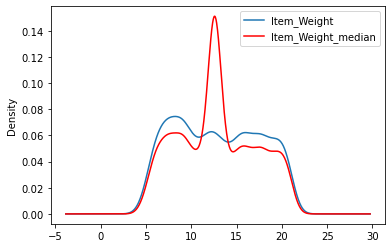

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

we can observe that there is a deviation in the distribution which leads to outilers

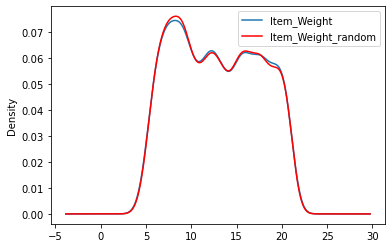

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

clearly, random weight imputation is much closer to item weight distribution

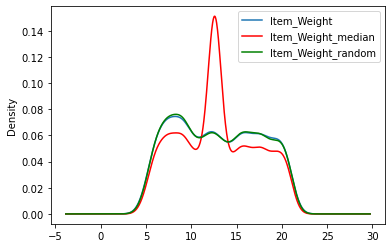

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
train.Item_Weight_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

'Item_weight' and 'Item_weight_random' are in the same distribution and hence we can drop the imputaion with median

In [29]:
def impute_nan(test,variable,median_new_data):
    new_data[variable+"_median"]=new_data[variable].fillna(median_new_data)
    new_data[variable+"_random"]=new_data[variable]
    random_sample=test[variable].dropna().sample(test[variable].isnull().sum(),random_state=0)
    random_sample.index=test[test[variable].isnull()].index
    new_data.loc[new_data[variable].isnull(),variable+'_random']=random_sample


In [30]:
impute_nan(new_data,'Item_Weight',median_new_data)
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_Weight_median,Item_Weight_random
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22,20.750,20.750
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,14,8.300,8.300
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,23,14.600,14.600
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,14,7.315,7.315
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36,12.500,15.100


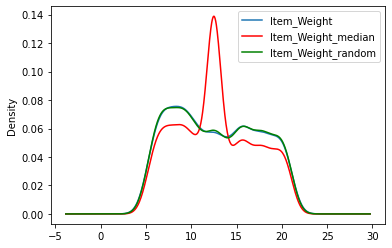

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
new_data['Item_Weight'].plot(kind='kde', ax=ax)
new_data.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
new_data.Item_Weight_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [32]:
train=train.drop(['Item_Weight_median','Item_Weight'],axis=1)
new_data=new_data.drop(['Item_Weight_median','Item_Weight'],axis=1)

D:\downloads\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

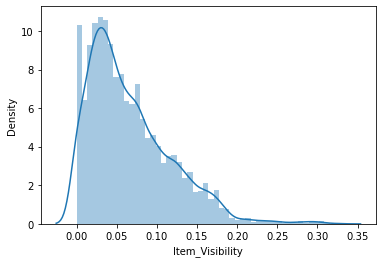

In [33]:
sns.distplot(train['Item_Visibility'])


data is right skewed which shows that it is positively skewed

D:\downloads\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

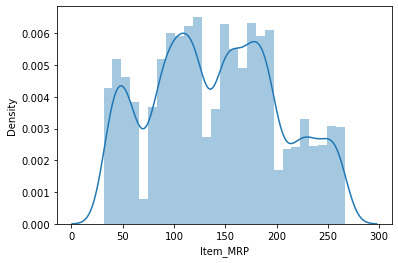

In [34]:
sns.distplot(train['Item_MRP'])

D:\downloads\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

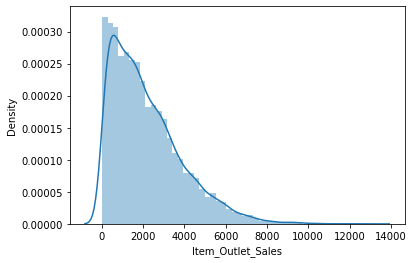

In [35]:
sns.distplot(train['Item_Outlet_Sales'])

sales are positively skewed , also shows peakness

D:\downloads\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_age', ylabel='Density'>

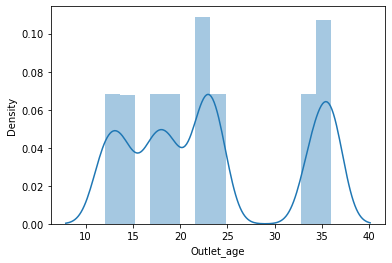

In [36]:
sns.distplot(train['Outlet_age'])

<AxesSubplot:>

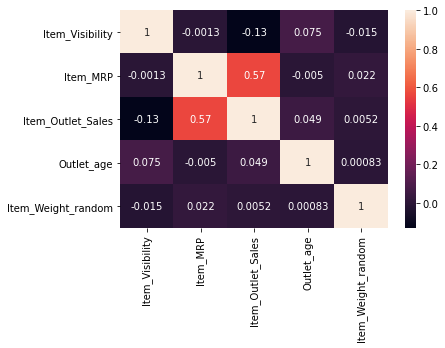

In [37]:
corr=train.iloc[:,1:].corr()
top_features=corr.index
sns.heatmap(train[top_features].corr(),annot=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

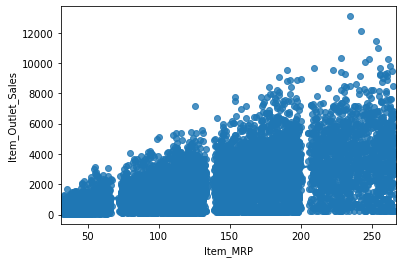

In [38]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)

as correlation said in the heatmap, as the mrp is increasing, sales are gradually increasing which shows good correlation

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

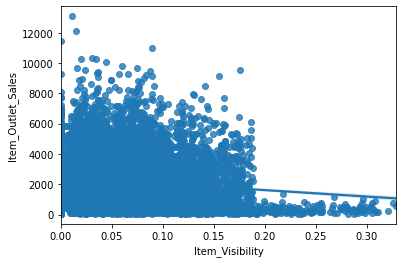

In [39]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)

Item_visibility does shows correlation in a negative direction

<AxesSubplot:xlabel='Item_Weight_random', ylabel='Item_Outlet_Sales'>

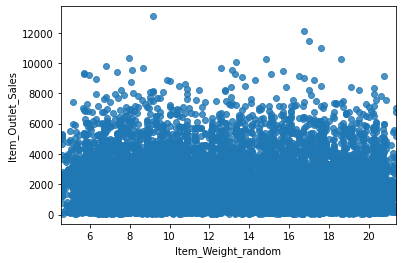

In [40]:
sns.regplot(x='Item_Weight_random',y='Item_Outlet_Sales',data=train)

very less correlation

ckecking possibilities to reduce dimensionality

In [41]:
train=train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
new_data=new_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

handling categorical variables

In [42]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [43]:
## Item_type has anyway very less correlation with sales and it has too many categorical variables, we can decrease them into categories which can reduce the dimensionality
train['Item_Type']=train['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Starchy Foods','Breakfast','Seafood','Others'],['edible','edible','non-edible','edible','edible','edible','edible','non-edible','edible','edible','edible','edible','edible','edible','edible','non-edible'],inplace = False)
new_data['Item_Type']=new_data['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Starchy Foods','Breakfast','Seafood','Others'],['edible','edible','non-edible','edible','edible','edible','edible','non-edible','edible','edible','edible','edible','edible','edible','edible','non-edible'],inplace = False)

In [44]:
train['Item_Type'].value_counts()

edible        6924
non-edible    1599
Name: Item_Type, dtype: int64

In [45]:
new_data.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_Weight_random
0,Low Fat,0.007565,edible,107.8622,Medium,Tier 1,Supermarket Type1,22,20.750
1,Regular,0.038428,edible,87.3198,Medium,Tier 2,Supermarket Type1,14,8.300
2,Low Fat,0.099575,non-edible,241.7538,Medium,Tier 3,Grocery Store,23,14.600
3,Low Fat,0.015388,edible,155.0340,Medium,Tier 2,Supermarket Type1,14,7.315
4,Regular,0.118599,edible,234.2300,Medium,Tier 3,Supermarket Type3,36,15.100


In [46]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Weight_random
0,Low Fat,0.016047,edible,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22,9.30
1,Regular,0.019278,edible,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12,5.92
2,Low Fat,0.016760,edible,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22,17.50
3,Regular,0.000000,edible,182.0950,Medium,Tier 3,Grocery Store,732.3800,23,19.20
4,Low Fat,0.000000,non-edible,53.8614,High,Tier 3,Supermarket Type1,994.7052,34,8.93


In [47]:
X=train[['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_age','Item_Weight_random']]
y=train['Item_Outlet_Sales']

In [48]:
categorical_columns = X.describe(include='object').columns.to_list()
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [49]:
X= pd.get_dummies(X,categorical_columns)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
X.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,22,9.30,1,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0.019278,48.2692,12,5.92,0,1,1,0,0,1,0,0,0,1,0,0,1,0
2,0.016760,141.6180,22,17.50,1,0,1,0,0,1,0,1,0,0,0,1,0,0
3,0.000000,182.0950,23,19.20,0,1,1,0,0,1,0,0,0,1,1,0,0,0
4,0.000000,53.8614,34,8.93,1,0,0,1,1,0,0,0,0,1,0,1,0,0


In [52]:
categorical_columns2 = new_data.describe(include='object').columns.to_list()
categorical_columns2

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [53]:
new_data= pd.get_dummies(new_data,categorical_columns2)

In [54]:
new_data.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.007565,107.8622,22,20.750,1,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0.038428,87.3198,14,8.300,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,0.099575,241.7538,23,14.600,1,0,0,1,0,1,0,0,0,1,1,0,0,0
3,0.015388,155.0340,14,7.315,1,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0.118599,234.2300,36,15.100,0,1,1,0,0,1,0,0,0,1,0,0,0,1


FEATURE SELECTION

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [56]:
rank=model.feature_importances_

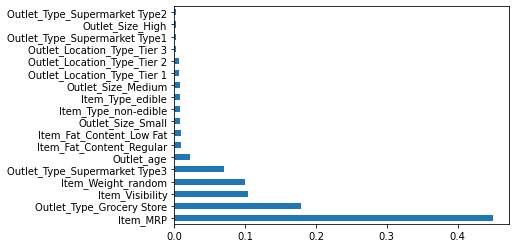

In [57]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

Dropping unnecessary features that have below 0% can be done but in this case, since they are giving 0.002% information , i did not want to loose any minute information as well. 

therefore no dropping is perfomed

In [58]:
X_train.shape

(6818, 18)

In [59]:
imp_fea=feat_importances.nlargest(18)
imp_fea

Item_MRP                         0.450397
Outlet_Type_Grocery Store        0.178228
Item_Visibility                  0.103886
Item_Weight_random               0.100192
Outlet_Type_Supermarket Type3    0.069718
Outlet_age                       0.022006
Item_Fat_Content_Regular         0.010023
Item_Fat_Content_Low Fat         0.010014
Outlet_Size_Small                0.008329
Item_Type_non-edible             0.008047
Item_Type_edible                 0.007868
Outlet_Size_Medium               0.007863
Outlet_Location_Type_Tier 1      0.006934
Outlet_Location_Type_Tier 2      0.006919
Outlet_Location_Type_Tier 3      0.002701
Outlet_Type_Supermarket Type1    0.002548
Outlet_Size_High                 0.002301
Outlet_Type_Supermarket Type2    0.002027
dtype: float64

SCALING

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [61]:
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [62]:
X_train.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.600703,0.470709,-0.136169,-0.724616,-1.344216,1.344216,0.483533,-0.483533,-0.349985,0.797369,-0.622920,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
1,-0.362159,0.457877,-0.493521,1.111785,0.743928,-0.743928,-2.068113,2.068113,-0.349985,0.797369,-0.622920,-0.616120,1.430073,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
2,0.194933,-0.482625,0.102066,1.025366,-1.344216,1.344216,0.483533,-0.483533,-0.349985,-1.254125,1.605343,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
3,-0.704944,-1.603553,-0.493521,-0.978471,0.743928,-0.743928,0.483533,-0.483533,-0.349985,0.797369,-0.622920,-0.616120,1.430073,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
4,1.383177,0.218375,0.102066,-0.000858,0.743928,-0.743928,0.483533,-0.483533,-0.349985,-1.254125,1.605343,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457


In [63]:
new_data=sc.fit_transform(new_data)
new_data=pd.DataFrame(new_data,columns=X_test.columns)


LINEAR REGRESSION

In [64]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(normalize=True)
model1.fit(X_train,y_train)

LinearRegression(normalize=True)

In [65]:
y_pred_train_model1 = model1.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model1)
print("r2 score is :",R2)

r2 score is : 0.5585188091252584


In [66]:
y_pred_test_model1 = model1.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred_test_model1)
print("r2 score is :",R2)

r2 score is : 0.5811664141325197


In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model1))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model1)))

MAE: 848.0295677416265
MSE: 1305923.5408108472
RMSE: 1142.7701172199277


In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test_model1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_model1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model1)))

MAE: 790.7853972677088
MSE: 1138377.1492815563
RMSE: 1066.9475850675872


In [72]:
!pip install xgboost



In [73]:
from xgboost import XGBRegressor
model2= XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, monotone_constraints='()',
             n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [74]:
model2.fit(X_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_pred_train_model2 = model2.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model2)
print("r2 score is :",R2)

r2 score is : 0.7037219067802329


In [76]:
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model2))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model2)))

MAE: 666.5770494440371
MSE: 876405.4835396637
RMSE: 936.1653078060859


In [77]:
y_pred_test_model2 = model2.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred_test_model2)
print("r2 score is :",R2)

r2 score is : 0.5887121486767044


In [78]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test_model2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_model2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model2)))

MAE: 732.0325818719224
MSE: 1117868.0686598262
RMSE: 1057.2928017629868


GradientBoostingRegressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
model3= GradientBoostingRegressor()

In [80]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [81]:
params = {'learning_rate': sp_randFloat(),'subsample'    : sp_randFloat(),'n_estimators' : sp_randInt(100, 1000),'max_depth'    : sp_randInt(4, 10)}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
randm_search = RandomizedSearchCV(estimator=model3, param_distributions = params,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_search.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000297DA60A130>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000297DA6ED460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000297DA6ED250>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000297DA60A1C0>})

In [83]:
print("Best estimators",randm_search.best_estimator_)
print("Best score",randm_search.best_score_)
print("Best params",randm_search.best_params_)

Best estimators GradientBoostingRegressor(learning_rate=0.03493140274285311, max_depth=8,
                          n_estimators=101, subsample=0.3266383221352368)
Best score 0.5585619970396221
Best params {'learning_rate': 0.03493140274285311, 'max_depth': 8, 'n_estimators': 101, 'subsample': 0.3266383221352368}


In [84]:
model3=  GradientBoostingRegressor(learning_rate=0.0154291815347819, max_depth=9,
                          n_estimators=165, subsample=0.11550214721325958)

In [85]:
model3.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.0154291815347819, max_depth=9,
                          n_estimators=165, subsample=0.11550214721325958)

In [86]:
y_pred_train_model3 = model3.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model3)
print("r2 score is :",R2)

r2 score is : 0.6753462243008692


In [87]:
y_pred_test_model3 = model3.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred_test_model3)
print("r2 score is :",R2)

r2 score is : 0.5944651951781008


In [88]:
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model3))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model3)))

MAE: 709.1823841032661
MSE: 960342.1777914665
RMSE: 979.9704984291448


In [89]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test_model3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_model3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model3)))

MAE: 748.5179870315837
MSE: 1102231.4604771768
RMSE: 1049.872116249011


gradient boost regressor and xgboost regressor are giving almost same root mean saure error but, comparitively , GBR is giving slightly more error than xgboost, if we observe r2 values of XGBOOST it is overfitting compared to GB REGRESSOR, one thing which is commonly observed is that testing data is only able to give 58% of r2 which means that only 58% is explainable by independant variable, although in XGBOOST 70% is explainable is training , it is overfitting in the testing, therefore best model which can predict BIGMART SALES would be GRADIENT BOOST REGRESSOR

In [90]:
import joblib
joblib.dump(model3,'BigMart_Sales.pkl')

['BigMart_Sales.pkl']